# New Section

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Load data
#get the data
df = pd.read_csv("/content/BTC-USD (2).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/26/2017,14036.59961,16461.19922,14028.90039,16099.80,16099.79981,1.345430e+10
1,12/27/2017,16163.50000,16930.90039,15114.29981,15838.50,15838.50000,1.248760e+10
2,12/28/2017,15864.09961,15888.40039,13937.29981,14606.50,14606.50000,1.233650e+10
3,12/29/2017,14695.79981,15279.00000,14307.00000,14656.20,14656.20020,1.302550e+10
4,12/30/2017,14681.90039,14681.90039,12350.09961,12952.20,12952.20020,1.445260e+10
...,...,...,...,...,...,...,...
1822,12/22/2022,16818.38086,16866.67383,16592.40820,16830.34,16830.34180,1.644157e+10
1823,12/23/2022,16829.64453,16905.21875,16794.45898,16796.95,16796.95313,1.532927e+10
1824,12/24/2022,16796.97656,16864.70313,16793.52734,16847.76,16847.75586,9.744636e+09
1825,12/25/2022,16847.50586,16860.55469,16755.25391,16841.99,16841.98633,1.165638e+10


In [3]:
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']
ma_1 = 7
ma_2 = 14
ma_3 = 21
df[f'SMA_{ma_1}'] = df['Close'].rolling(window=ma_1).mean()
df[f'SMA_{ma_2}'] = df['Close'].rolling(window=ma_2).mean()
df[f'SMA_{ma_3}'] = df['Close'].rolling(window=ma_3).mean()

df[f'SD_{ma_1}'] = df['Close'].rolling(window=ma_1).std()
df[f'SD_{ma_3}'] = df['Close'].rolling(window=ma_3).std()
df.dropna(inplace=True)

df.to_csv("/content/BTC-USD (2).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,SMA_7,SMA_14,SMA_21,SD_7,SD_21
20,1/15/2018,13767.29981,14445.50000,13641.700200,13819.80,13819.79981,1.275080e+10,803.799800,-52.50019,14129.585714,15092.400000,14917.161905,540.357432,1239.058043
21,1/16/2018,13836.09961,13843.09961,10194.900390,11490.50,11490.50000,1.885380e+10,3648.199220,2345.59961,13686.028571,14843.000000,14697.671429,1089.534061,1414.867099
22,1/17/2018,11431.09961,11678.00000,9402.290039,11188.60,11188.59961,1.883060e+10,2275.709961,242.49961,13145.357143,14556.400000,14476.247619,1268.615347,1581.446680
23,1/18/2018,11198.79981,12107.29981,10942.500000,11474.90,11474.90039,1.502040e+10,1164.799810,-276.10019,12869.514286,14261.807143,14327.123810,1405.126389,1710.900315
24,1/19/2018,11429.79981,11992.79981,11172.099610,11607.40,11607.40039,1.074040e+10,820.700200,-177.60019,12530.485714,13845.942857,14181.942857,1378.412094,1808.170022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,12/22/2022,16818.38086,16866.67383,16592.408200,16830.34,16830.34180,1.644157e+10,274.265630,-11.95914,16742.058571,17052.053571,17047.717619,154.870933,330.000116
1823,12/23/2022,16829.64453,16905.21875,16794.458980,16796.95,16796.95313,1.532927e+10,110.759770,32.69453,16763.411429,17028.039286,17033.826667,149.881278,334.302073
1824,12/24/2022,16796.97656,16864.70313,16793.527340,16847.76,16847.75586,9.744636e+09,71.175790,-50.78344,16770.935714,17007.970714,17030.946667,153.025723,335.695705
1825,12/25/2022,16847.50586,16860.55469,16755.253910,16841.99,16841.98633,1.165638e+10,105.300780,5.51586,16782.937143,16989.242143,17017.208571,155.120304,337.317687


In [4]:
pre_day = 30
#feature scaling (MinMax Scaler)
scala_x = MinMaxScaler(feature_range=(0,1))
scala_y = MinMaxScaler(feature_range=(0,1))

cols_x = ['H-L', 'O-C', f'SMA_{ma_1}', f'SMA_{ma_2}', f'SMA_{ma_3}', f'SD_{ma_1}', f'SD_{ma_3}']
cols_y = ['Close']
scaled_data_x = scala_x.fit_transform(df[cols_x].values.reshape(-1, len(cols_x)))
scaled_data_y = scala_y.fit_transform(df[cols_y].values.reshape(-1, len(cols_y)))
#Split the data into x_train and y_train data sets
x_total = []
y_total = []
#create a loop of values
for i in range(pre_day, len(df)):
    x_total.append(scaled_data_x[i-pre_day:i])
    y_total.append(scaled_data_y[i])
#Splitting the dataset
test_size = (int)(len(scaled_data_y) * 0.3)
print(test_size)

x_train = np.array(x_total[:len(x_total)-test_size])
x_test = np.array(x_total[len(x_total)-test_size:])
y_train = np.array(y_total[:len(y_total)-test_size])
y_test = np.array(y_total[len(y_total)-test_size:])

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

542
(1235, 30, 7) (1235, 1) (542, 30, 7) (542, 1)


In [ ]:
# Build model
model = Sequential()
#5 layers lstm, and first lstm connect input information
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=len(cols_y)))
#trainning model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, steps_per_epoch=40, use_multiprocessing=True)

Epoch 1/100
40/40 [==============================] - 13s 17ms/step - loss: 0.0109
Epoch 2/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0061
Epoch 3/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 4/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 5/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0036
Epoch 6/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 7/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 8/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 9/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 10/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 11/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 12/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 13/100
40/40 [====

In [ ]:
# Testing
predict_price = model.predict(x_test)
predict_price = scala_y.inverse_transform(predict_price)

17/17 [==============================] - 2s 7ms/step


(542, 1)


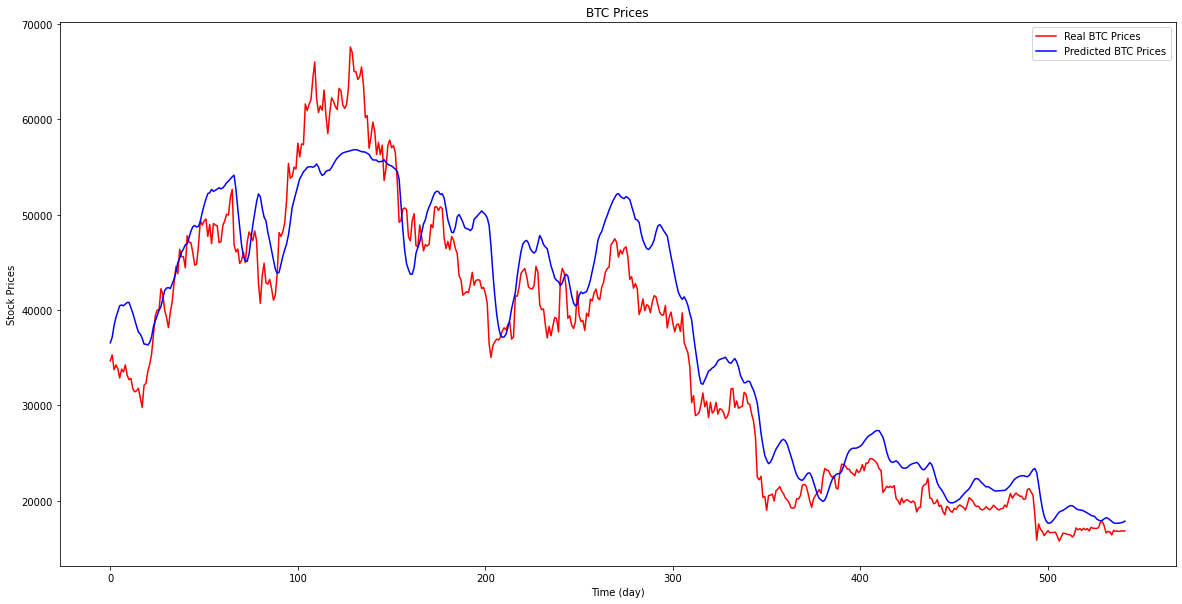

In [ ]:
# Ploting the stat
real_price = df[len(df)-test_size:]['Close'].values.reshape(-1,1)
real_price = np.array(real_price)
print(real_price.shape)
real_price = real_price.reshape(real_price.shape[0], 1)

plt.figure(figsize=(20,10))
plt.plot(real_price, color="red", label=f"Real BTC Prices") # real price line
plt.plot(predict_price, color="blue", label=f"Predicted BTC Prices") # predict_price line
plt.title(f"BTC Prices") # naming chart
plt.xlabel("Time (day)")
plt.ylabel("Stock Prices")
plt.legend() #note
plt.show()

In [ ]:
# Make Prediction
x_predict = df[len(df)-pre_day:][cols_x].values.reshape(-1, len(cols_x))
x_predict = scala_x.transform(x_predict)
x_predict = np.array(x_predict)
x_predict = x_predict.reshape(1, x_predict.shape[0], len(cols_x))

prediction = model.predict(x_predict)
prediction = scala_y.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 0s 25ms/step
[[17996.53]]


In [ ]:
mae = mean_absolute_error(real_price, predict_price)
mape = mean_absolute_percentage_error(real_price, predict_price)
mse = mean_squared_error(real_price, predict_price)
rmse = np.sqrt(mse)
r2 = r2_score(real_price, predict_price)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 3646.48
MAPE: 11.03%
MSE: 19080635.36
RMSE: 4368.14
R2: 0.90
